In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [4]:
loan_cleaned=pd.read_csv('../.Database/logit_predictions.csv')
loan_cleaned.set_index('id',inplace=True)
loan_cleaned.head(5)

,const,delinq_2yrs,dti,inq_last_6mths,loan_amnt,mths_since_last_delinq,pub_rec,total_acc,acc_now_delinq,log_annual_inc,Effective Federal Funds Rate,state_unemployment,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_10+ years,emp_length_2-5 years,emp_length_6-9 years,predicted_probs
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
387539,1.0,-0.338807,-1.450360,6.146282,-1.495947,-0.689396,-0.324767,0.077673,-0.052444,-2.884386,0.124689,1.188471,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.408992
12527917,1.0,0.973035,0.340166,0.961526,-0.457046,0.236059,-0.324767,0.840364,-0.052444,1.670306,-0.168423,-1.644192,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.112497
883654,1.0,-0.338807,-0.075195,-0.766726,-1.068164,-0.689396,-0.324767,2.365746,-0.052444,-0.055426,-0.200991,-0.422259,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.066692
15309561,1.0,0.973035,-1.541100,0.097400,-0.563992,0.015713,-0.324767,0.331903,-0.052444,0.916996,-0.168423,0.188708,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.182540
40959969,1.0,-0.338807,-0.387036,-0.766726,0.276296,-0.689396,-0.324767,-1.193479,-0.052444,-0.398991,-0.103287,-0.366717,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.206471


In [5]:
loan_original=pd.read_csv('../.Database/merged_cleaned_loan.csv')
loan_original.set_index('id',inplace=True)
loan_original.head(5)

,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,grade,home_ownership,inq_last_6mths,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,B,RENT,1.0,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07,8.8
1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,C,RENT,5.0,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07,9.6
1077175,12252.0,IL,0.0,8.72,NaN,10+ years,C,RENT,2.0,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07,9.5
1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,C,RENT,1.0,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07,11.3
1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,A,RENT,3.0,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07,8.8


In [6]:
loan_updated = loan_original.merge(loan_cleaned.reset_index()[['id', 'predicted_probs']], on='id', how='left')
loan_updated.set_index('id', inplace=True)
loan_updated.head(5)

,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,grade,home_ownership,inq_last_6mths,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment,predicted_probs
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,B,RENT,1.0,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07,8.8,0.300042
1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,C,RENT,5.0,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07,9.6,0.314461
1077175,12252.0,IL,0.0,8.72,NaN,10+ years,C,RENT,2.0,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07,9.5,0.431177
1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,C,RENT,1.0,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07,11.3,0.194295
1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,A,RENT,3.0,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07,8.8,0.163702


In [7]:
# As there is only 1 observation with home_ownership = ANY,
# we will drop that observation to avoid issues with regression
loan_updated = loan_updated.drop(loan_updated[loan_updated['home_ownership'] == 'ANY'].index)

In [8]:
# Drop non-numerical columns from X
X=loan_updated.drop(columns=['addr_state','emp_title','loan_status','issue_d','issue_y','issue_m','title','loan_status_grouped'])

# Drop annual_inc, to use log_annual_inc
X=X.drop(columns=['annual_inc'])

# Drop outcome variables from X
X=X.drop(columns=['grade','sub_grade', 'int_rate'])

# Select outcome variable for Y
y=loan_updated['int_rate']/100

In [9]:
# Separate numerical and categorical columns
categorical_columns = ['home_ownership', 'term','purpose','emp_length']
numerical_columns = X.select_dtypes(include=['float64']).columns

# Apply OneHotEncoding to categorical columns before splitting
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure the train and test sets have the same structure (dummies already handled)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## XGBoost

In [10]:
from xgboost import XGBRegressor

# Initialize XGBRegressor with basic parameters
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred = xgb_model.predict(X_test)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 0.026406249455544817
MSE: 0.0010855506290151683
RMSE: 0.03294769535210571
R2 Score: 0.439700319126032


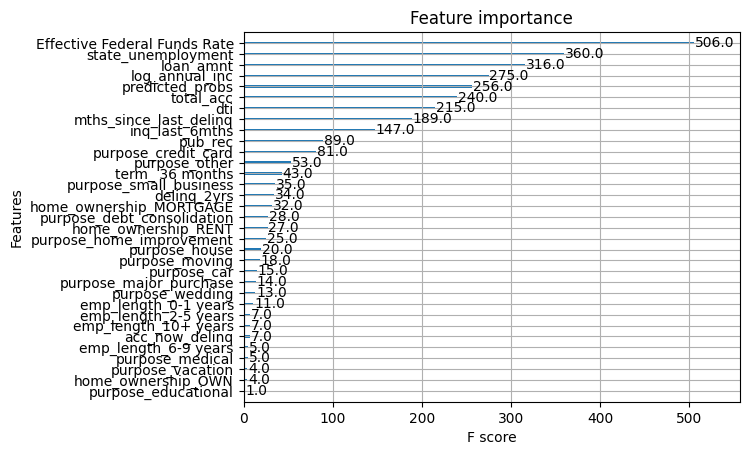

In [12]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [13]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'), param_grid=params, scoring='r2', cv=5)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)


## Linear Regression

In [14]:
import statsmodels.api as sm

# Apply OneHotEncoding to categorical columns before splitting
# dtype=int to get binary (0 or 1) values
X_encoded = pd.get_dummies(X, columns=categorical_columns, dtype=int)

# Drop the following dummies to avoid dummy variable trap
# This ensures K-1 dummies for K groups
# Dropped dummies represent the base group
# The coefficients of the regressed dummies will be relative to the base group
X_encoded = X_encoded.drop(columns=['home_ownership_MORTGAGE','term_ 36 months','purpose_car','emp_length_0-1 years'])

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure the train and test sets have the same structure (dummies already handled)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [15]:
# Drop rows with NaN values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure y_train matches X_train, y_test matches X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [16]:
# Add a constant to the independent variables
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fit the linear regression model
linear_model = sm.OLS(y_train, X_train_with_const)

# Fit the model and obtain the result object
result = linear_model.fit()

# Print the summary of the linear regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     3367.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:39:17   Log-Likelihood:             3.9536e+05
No. Observations:              206220   AIC:                        -7.906e+05
Df Residuals:                  206186   BIC:                        -7.903e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [17]:
# Making predictions
y_pred = result.predict(X_test_with_const) 

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False for RMSE
r_squared = result.rsquared

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r_squared}')

Mean Absolute Error (MAE): 0.02845138737999046
Mean Squared Error (MSE): 0.0012552886980239759
Root Mean Squared Error (RMSE): 0.03543005359894303
R-squared (R²): 0.35020808366643297


C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
